<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Приведение-типов" data-toc-modified-id="Приведение-типов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Приведение типов</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проверка дубликатов</a></span><ul class="toc-item"><li><span><a href="#Проверка-неявных-дубликатов" data-toc-modified-id="Проверка-неявных-дубликатов-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Проверка неявных дубликатов</a></span></li><li><span><a href="#Проверка-явных-дубликатов" data-toc-modified-id="Проверка-явных-дубликатов-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Проверка явных дубликатов</a></span></li></ul></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Добавление-вспомогательных-столбцов" data-toc-modified-id="Добавление-вспомогательных-столбцов-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Добавление вспомогательных столбцов</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Обработка аномальных значений</a></span><ul class="toc-item"><li><span><a href="#Цена-автомобиля" data-toc-modified-id="Цена-автомобиля-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Цена автомобиля</a></span></li><li><span><a href="#Год-регистрации-автомобиля" data-toc-modified-id="Год-регистрации-автомобиля-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Год регистрации автомобиля</a></span></li><li><span><a href="#Мощность-автомобиля" data-toc-modified-id="Мощность-автомобиля-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Мощность автомобиля</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Разделение-признаков" data-toc-modified-id="Разделение-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение признаков</a></span></li><li><span><a href="#Вспомогательные-функции" data-toc-modified-id="Вспомогательные-функции-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вспомогательные функции</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Необходимо построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания (минимальное RMSE);
- скорость предсказания;
- время обучения.

## Подготовка данных

### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

### Изучение данных

In [2]:
df = pd.read_csv('/datasets/autos.csv')

In [3]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


**Выводы**

Датасет содержит 354369 строк и 16 столбцов. Были выявлены следующие отклонения:
- названия столбцов не соответствуют «змеиному» стилю;
- присутствуют пропущенные значения в столбцах с текстом;
- присутствую аномальные значения (слишком низкие и высокие значения в столбцах с Ценой, Годом регистрации и Мощностью).
Также необходимо провести проверку на дубликаты.

### Переименование столбцов

Приведем названия столбцов к "змеиному" стилю.

In [6]:
df.columns = df.columns.str.replace(r'(?=[A-Z])', r'_', regex=True)\
                       .str.lower()\
                       .str[1:]

In [7]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'not_repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

### Приведение типов

In [8]:
for col in ['date_crawled', 'date_created', 'last_seen']:
    df[col] = pd.to_datetime(df[col])

In [9]:
np.sort(df['kilometer'].unique())

array([  5000,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 125000, 150000])

In [10]:
df['kilometer'] = df['kilometer'].astype(str)

**Выводы**

Столбцы с датой были приведены к типу `datetime`. Столбец с пробегом был приведен к строкову типу, т.к. является категориальной характеристикой.

### Проверка дубликатов

Сохраним исходное количество строк в датасете в переменную `nrows_initial`, чтобы после обработки проверить, какой процент данных мы удалили.

In [11]:
nrows_initial = len(df)

#### Проверка неявных дубликатов

In [12]:
columns_with_text = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [13]:
for col in columns_with_text:
    print(col)
    print(np.sort(df[col].dropna().unique()))
    print()

vehicle_type
['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'suv' 'wagon']

gearbox
['auto' 'manual']

model
['100' '145' '147' '156' '159' '1_reihe' '1er' '200' '2_reihe' '300c'
 '3_reihe' '3er' '4_reihe' '500' '5_reihe' '5er' '601' '6_reihe' '6er'
 '7er' '80' '850' '90' '900' '9000' '911' 'a1' 'a2' 'a3' 'a4' 'a5' 'a6'
 'a8' 'a_klasse' 'accord' 'agila' 'alhambra' 'almera' 'altea' 'amarok'
 'antara' 'arosa' 'astra' 'auris' 'avensis' 'aveo' 'aygo' 'b_klasse'
 'b_max' 'beetle' 'berlingo' 'bora' 'boxster' 'bravo' 'c1' 'c2' 'c3' 'c4'
 'c5' 'c_klasse' 'c_max' 'c_reihe' 'caddy' 'calibra' 'captiva' 'carisma'
 'carnival' 'cayenne' 'cc' 'ceed' 'charade' 'cherokee' 'citigo' 'civic'
 'cl' 'clio' 'clk' 'clubman' 'colt' 'combo' 'cooper' 'cordoba' 'corolla'
 'corsa' 'cr_reihe' 'croma' 'crossfire' 'cuore' 'cx_reihe' 'defender'
 'delta' 'discovery' 'doblo' 'ducato' 'duster' 'e_klasse' 'elefantino'
 'eos' 'escort' 'espace' 'exeo' 'fabia' 'fiesta' 'focus' 'forester'
 'forfour' 'fortwo' 'fox' 'free

**Выводы**

Неявные дубликаты не выявлены. 

В некоторых столбцах содержится значение `other`. При необходимости используем его в качестве "заглушки" при заполнении пропусков, чтобы не создавать новые переменные.

#### Проверка явных дубликатов

In [14]:
df.duplicated().sum()

4

In [15]:
df = df.drop_duplicates()

**Выводы**

Выявлено четыре явных дубликата, которые были удалены.

### Заполнение пропусков

In [16]:
1 - len(df.dropna()) / nrows_initial

0.30634451659146256

In [17]:
df = df.fillna('other')

**Выводы**

При удалении пропущенных значений мы бы потеряли 30 % данных. Это большое количество. Поэтому пропуски были заполнены "заглушкой", найденной при анализе дубликатов.

### Добавление вспомогательных столбцов

In [18]:
df['year_created'] = df['date_created'].dt.year
df['month_created'] = df['date_created'].dt.month

df['year_last_seen'] = df['last_seen'].dt.year
df['month_last_seen'] = df['last_seen'].dt.month

In [19]:
df['total_months'] = ((12 * df['year_last_seen'] + df['month_last_seen']) - 
                      (12 * df['registration_year'] + df['registration_month']))

**Выводы**

Для дальнейшего обучения моделей будем использовать не год и месяц регистрации автомобиля, а сколько ему было всего месяцев на момент продажи (`total_months`). Годом и месяцем продажи будем считать год и месяц последней активности пользователя.

### Обработка аномальных значений

#### Цена автомобиля

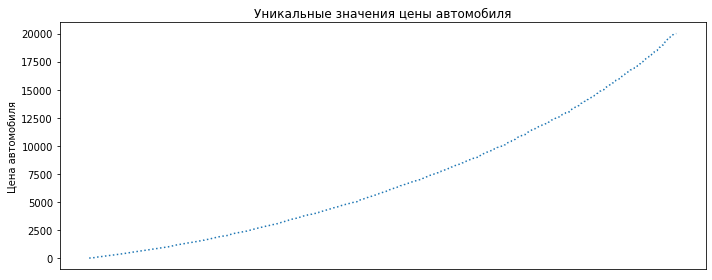

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(pd.Series(np.sort(df['price'].unique())), linestyle=':')

ax.set_title('Уникальные значения цены автомобиля')
ax.set_ylabel('Цена автомобиля')
ax.set_xticks([])

fig.tight_layout()

plt.show()

In [21]:
df.groupby('postal_code')['price'].agg(['count', 'sum']).sort_values(by='sum').head(10)

,count,sum
postal_code,,
44239,1,0
96367,1,0
89294,1,0
8265,1,0
95682,2,0
17329,1,100
89368,1,120
4685,1,150
6725,1,150


In [22]:
df = df[df['price'] >= 100]

**Выводы**

Из-за того, что уникальные цены автомобиля непрерывно растут от 0 до 20000 евро, график не показал точку, по которой мы могли бы откинуть аномально низкие значения. 

После этого для каждого пользователя было рассчитано количество сделок и их общая сумма. Группировка показала, что самой низкой адекватной ценой является значение 100 евро. Все значения ниже 100 евро были удалены. 

#### Год регистрации автомобиля

*Этап №1*

In [23]:
np.sort(df['registration_year'].unique())

array([1000, 1001, 1039, 1111, 1234, 1255, 1300, 1400, 1500, 1600, 1602,
       1800, 1910, 1923, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2066, 2200, 2222,
       2290, 2500, 2800, 2900, 3000, 3200, 3700, 3800, 4000, 4100, 4500,
       4800, 5000, 5300, 5555, 5600, 5900, 5911, 6000, 7000, 7100, 7800,
       8200, 8500, 8888, 9000, 9450, 9999])

In [24]:
df = df[(df['registration_year'] >= 1910) & (df['registration_year'] <= 2019)]

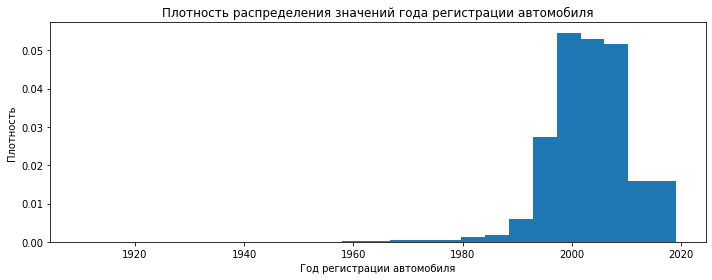

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(df['registration_year'], bins=25, density=True)

ax.set_title('Плотность распределения значений года регистрации автомобиля')
ax.set_ylabel('Плотность')
ax.set_xlabel('Год регистрации автомобиля')

fig.tight_layout()

plt.show()

In [26]:
df = df[df['registration_year'] >= 1960]

*Этап №2*

In [27]:
df['date_created'].max()

Timestamp('2016-04-07 00:00:00')

In [28]:
df = df[df['registration_year'] <= df['year_created']]

In [29]:
df = df[~((df['registration_year'] == df['year_created']) & 
          ((df['registration_month'] == 0) | (df['registration_month'] > df['month_created'])))]

In [30]:
df['registration_year'].max()

2016

In [31]:
df[df['registration_year'] == 2016]['registration_month'].unique()

array([1, 3, 2, 4])

**Выводы**

Обработка аномальных значений для года регистрации автомобиля состояла из двух этапов.

*Этап №1*

Нас основании списка уникальных значений года регистрации автомобиля для фильтрации было выбрано нижнее значение (1910 год) и верхнее значение (2019 год). Гистограмма распределения плотностей показала, что ниже 1960 года данных почти нет. Поэтому автомобили младше 1960 года также были удалены.

*Этап №2*

Второй этап заключался в проверке того, что год и месяц регистрации автомобиля не превышает год и месяц создания анкеты. В противном случае получается, что мы продаем машины из будущего. Сначала была сделана общая фильтрация и удалены все автомобили, у которых год регистрации был больше, чем год создания анкеты. Далее для тех позиций, у которых год регистрации равен году создания анкеты, проверялся месяц регистрации. И если он был равен нулю или превышал месяц создания анкеты, то эта позиция удалялась.

#### Мощность автомобиля

In [32]:
df = df[(df['power'] >= 50) & (df['power'] <= 500)]

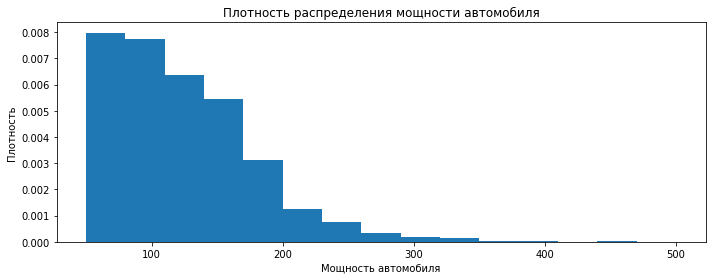

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(df['power'], bins=15, density=True)

ax.set_title('Плотность распределения мощности автомобиля')
ax.set_ylabel('Плотность')
ax.set_xlabel('Мощность автомобиля')

fig.tight_layout()

plt.show()

In [34]:
df = df[df['power'] <= 400]

**Выводы**

В интернет-источниках сказано, что мощность автомобилей находится где-то в районе от 50 до 500 л.с. Гистограмма распределения плотностей показала, что выше 400 л.с. автомобилей практически нет. Поэтому автомобили с мощностью выше 400 л.с. также были удалены.

### Общий вывод

In [35]:
1 - len(df) / nrows_initial

0.19686823621705063

В ходе предобработки данных были удалены все аномальные значения и дубликаты, заполнены пропуски, данные приведены к необходимым типам и добавлены дополнительные столбцы.

Всего суммарно было удалено почти 20 % данных.

## Обучение моделей

### Разделение признаков

Создадим два набора данных:
- набор `X`: с признаками, которые используются для предсказания (Тип кузова, Тип коробки передач, Мощность, Модель, Пробег, Тип топлива, Марка, Признак ремонта и Общее количество месяцев);
- набор `y`: с целевым признаком, который нужно предсказать (Цена).

In [36]:
X = df[['vehicle_type', 'gearbox', 'power', 'model', 'kilometer', 
        'fuel_type', 'brand', 'not_repaired', 'total_months']].copy()

y = df['price'].copy()

Также создадим два вспомогательных списка:
- `numeric` - с числовыми признаками;
- `categorical` - с категориальными признаками.

In [37]:
numeric = ['power', 'total_months']
categorical = ['vehicle_type', 'gearbox', 'model', 'kilometer','fuel_type', 'brand', 'not_repaired']

### Вспомогательные функции

In [38]:
# функция для разделения выборки на train и test с фиксированными параметрами 'test_size' и 'random_state'

def train_test(features, target):
    features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                                test_size=0.25, 
                                                                                random_state=42) 
    return features_train, features_test, target_train, target_test

In [39]:
# функция для расчета метрики RMSE

def rmse(y_target, y_pred):
    return mean_squared_error(y_target, y_pred)**0.5

In [40]:
scorer = make_scorer(rmse, greater_is_better=False)

In [41]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

### DecisionTreeRegressor

In [42]:
X_ohe = pd.get_dummies(X, columns=categorical, drop_first=True)

In [43]:
X_train, X_test, y_train, y_test = train_test(X_ohe, y)

In [44]:
DTR = DecisionTreeRegressor(random_state=42)

In [45]:
param_dist = {'max_depth': np.array([5, 6, 7, 8, 9]),
              'min_samples_split': np.array([31, 65, 127, 255, 511])}

In [46]:
DTR_randomized = RandomizedSearchCV(DTR, 
                                    param_dist, 
                                    n_iter=5, 
                                    scoring=scorer, 
                                    cv=kfold,
                                    verbose=100,
                                    n_jobs=-1, 
                                    random_state=42)

In [47]:
%%time

DTR_randomized.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3; 1/5] START max_depth=6, min_samples_split=255..........................
[CV 1/3; 1/5] END ........max_depth=6, min_samples_split=255; total time=   1.9s
[CV 2/3; 1/5] START max_depth=6, min_samples_split=255..........................
[CV 2/3; 1/5] END ........max_depth=6, min_samples_split=255; total time=   1.8s
[CV 3/3; 1/5] START max_depth=6, min_samples_split=255..........................
[CV 3/3; 1/5] END ........max_depth=6, min_samples_split=255; total time=   1.9s
[CV 1/3; 2/5] START max_depth=8, min_samples_split=65...........................
[CV 1/3; 2/5] END .........max_depth=8, min_samples_split=65; total time=   2.3s
[CV 2/3; 2/5] START max_depth=8, min_samples_split=65...........................
[CV 2/3; 2/5] END .........max_depth=8, min_samples_split=65; total time=   2.3s
[CV 3/3; 2/5] START max_depth=8, min_samples_split=65...........................
[CV 3/3; 2/5] END .........max_depth=8, min_sampl

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=DecisionTreeRegressor(random_state=42), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 31,  65, 127, 255, 511])},
                   random_state=42,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=100)

In [48]:
DTR_randomized.best_score_

-2043.3210405151087

In [49]:
DTR_randomized.best_params_

{'min_samples_split': 255, 'max_depth': 9}

In [50]:
DTR_best = DTR_randomized.best_estimator_

In [51]:
%%time

DTR_best.fit(X_train, y_train)

CPU times: user 3.41 s, sys: 192 ms, total: 3.6 s
Wall time: 3.61 s


DecisionTreeRegressor(max_depth=9, min_samples_split=255, random_state=42)

In [52]:
%%time

rmse(y_test, DTR_best.predict(X_test))

CPU times: user 57.2 ms, sys: 76.1 ms, total: 133 ms
Wall time: 140 ms


2009.3554294601092

In [53]:
del X_ohe, X_train, X_test, y_train, y_test

**Выводы**

Для модели `DecisionTreeRegressor` с параметрами `min_samples_split`: 255, `max_depth`: 9:
- RMSE на кросс-валидации: -2043 евро;
- время обучения модели: 3.61 с;
- время предсказания: 140 мс;
- RMSE на тесте: 2009 евро.

### CatBoostRegressor

In [54]:
X_train, X_test, y_train, y_test = train_test(X, y)

In [55]:
CBR = CatBoostRegressor(loss_function='RMSE', 
                        cat_features=categorical, 
                        verbose=False,
                        random_state=42,
                        early_stopping_rounds=200)

In [56]:
param_dist = {'learning_rate': np.linspace(0.1, 0.5, num=5),
              'iterations': np.array([200, 400, 600, 800, 1000])}

In [57]:
CBR_randomized = RandomizedSearchCV(CBR, 
                                    param_dist, 
                                    n_iter=5, 
                                    scoring=scorer, 
                                    cv=kfold,
                                    verbose=100,
                                    n_jobs=-1, 
                                    random_state=42)

In [58]:
%%time

CBR_randomized.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3; 1/5] START iterations=400, learning_rate=0.4...........................
[CV 1/3; 1/5] END .........iterations=400, learning_rate=0.4; total time= 1.0min
[CV 2/3; 1/5] START iterations=400, learning_rate=0.4...........................
[CV 2/3; 1/5] END .........iterations=400, learning_rate=0.4; total time= 1.0min
[CV 3/3; 1/5] START iterations=400, learning_rate=0.4...........................
[CV 3/3; 1/5] END .........iterations=400, learning_rate=0.4; total time= 1.0min
[CV 1/3; 2/5] START iterations=800, learning_rate=0.2...........................
[CV 1/3; 2/5] END .........iterations=800, learning_rate=0.2; total time= 2.1min
[CV 2/3; 2/5] START iterations=800, learning_rate=0.2...........................
[CV 2/3; 2/5] END .........iterations=800, learning_rate=0.2; total time= 2.1min
[CV 3/3; 2/5] START iterations=800, learning_rate=0.2...........................
[CV 3/3; 2/5] END .........iterations=800, learni

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x7efb7a649310>,
                   n_iter=5, n_jobs=-1,
                   param_distributions={'iterations': array([ 200,  400,  600,  800, 1000]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5])},
                   random_state=42,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=100)

In [59]:
CBR_randomized.best_score_

-1553.0163370943076

In [60]:
CBR_randomized.best_params_

{'learning_rate': 0.4, 'iterations': 1000}

In [61]:
CBR_best = CBR_randomized.best_estimator_

In [62]:
%%time

CBR_best.fit(X_train, y_train)

CPU times: user 4min 4s, sys: 1.07 s, total: 4min 5s
Wall time: 4min 7s


In [63]:
%%time

rmse(y_test, CBR_best.predict(X_test))

CPU times: user 1.02 s, sys: 7.98 ms, total: 1.03 s
Wall time: 1.03 s


1519.656334279963

In [64]:
del X_train, X_test, y_train, y_test

**Выводы**

Для модели `CatBoostRegressor` с параметрами `learning_rate`: 0.4, `iterations`: 1000:
- RMSE на кросс-валидации: -1553 евро;
- время обучения модели: 247 с;
- время предсказания: 1.03 с;
- RMSE на тесте: 1520 евро.

### LGBMRegressor

In [65]:
X_train, X_test, y_train, y_test = train_test(X, y)

In [66]:
pd.options.mode.chained_assignment = None

X_train[categorical] = X_train[categorical].astype('category')
X_test[categorical] = X_test[categorical].astype('category')

In [67]:
LGBMR = LGBMRegressor(n_estimators=100, 
                      max_depth=9, 
                      objective='rmse', 
                      random_state=42, 
                      n_jobs=-1)

In [68]:
param_dist = {'learning_rate': np.linspace(0.1, 0.5, num=5),
              'num_leaves': np.array([31, 65, 127, 255, 511])}

In [69]:
LGBMR_randomized = RandomizedSearchCV(LGBMR, 
                                      param_dist, 
                                      n_iter=5, 
                                      scoring=scorer, 
                                      cv=kfold,
                                      verbose=100,
                                      n_jobs=-1, 
                                      random_state=42)

In [70]:
%%time

LGBMR_randomized.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3; 1/5] START learning_rate=0.2, num_leaves=255...........................
[CV 1/3; 1/5] END .........learning_rate=0.2, num_leaves=255; total time=   9.8s
[CV 2/3; 1/5] START learning_rate=0.2, num_leaves=255...........................
[CV 2/3; 1/5] END .........learning_rate=0.2, num_leaves=255; total time=   9.6s
[CV 3/3; 1/5] START learning_rate=0.2, num_leaves=255...........................
[CV 3/3; 1/5] END .........learning_rate=0.2, num_leaves=255; total time=   8.7s
[CV 1/3; 2/5] START learning_rate=0.4, num_leaves=65............................
[CV 1/3; 2/5] END ..........learning_rate=0.4, num_leaves=65; total time=   4.6s
[CV 2/3; 2/5] START learning_rate=0.4, num_leaves=65............................
[CV 2/3; 2/5] END ..........learning_rate=0.4, num_leaves=65; total time=   7.6s
[CV 3/3; 2/5] START learning_rate=0.4, num_leaves=65............................
[CV 3/3; 2/5] END ..........learning_rate=0.4, nu

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LGBMRegressor(max_depth=9, objective='rmse',
                                           random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'num_leaves': array([ 31,  65, 127, 255, 511])},
                   random_state=42,
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=100)

In [71]:
LGBMR_randomized.best_score_

-1527.3149527105752

In [72]:
LGBMR_randomized.best_params_

{'num_leaves': 255, 'learning_rate': 0.2}

In [73]:
LGBMR_best = LGBMR_randomized.best_estimator_

In [74]:
%%time

LGBMR_best.fit(X_train, y_train)

CPU times: user 10.5 s, sys: 31.3 ms, total: 10.6 s
Wall time: 10.6 s


LGBMRegressor(learning_rate=0.2, max_depth=9, num_leaves=255, objective='rmse',
              random_state=42)

In [75]:
%%time

rmse(y_test, LGBMR_best.predict(X_test))

CPU times: user 1.01 s, sys: 0 ns, total: 1.01 s
Wall time: 1 s


1490.9500251703798

In [76]:
del X_train, X_test, y_train, y_test

**Выводы**

Для модели `LGBMRegressor` с параметрами `num_leaves`: 255, `learning_rate`: 0.2:
- RMSE на кросс-валидации: -1527 евро;
- время обучения модели: 10.6 с;
- время предсказания: 1 с;
- RMSE на тесте: 1491 евро

## Анализ моделей

Сводная информация для рассмотренных моделей приведена в таблице.

|Модель               |RMSE на кросс-валидации|Время обучения модели|Время предсказания|RMSE на тесте|
|:--------------------|:---------------------:|:-------------------:|:----------------:|:-----------:|
|DecisionTreeRegressor|-2043 евро             |3.61 с               |140 мс            |2009 евро    |
|CatBoostRegressor    |-1553 евро             |247 с                |1.03 с            |1520 евро    |
|LGBMRegressor        |-1527 евро             |10.6 с               |1 с               |1491 евро    |

Лучшей моделью в соотношении Качество предсказаний-Скорость обучения-Скорость предсказания получился `LGBMRegressor` с параметрами `num_leaves`: 255, `learning_rate`: 0.2.